# Regression example
- Boston housing prices; predicting a continuous value instead of a discrete label
- only 404 training and 102 test samples
- Features are on different scales

In [1]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 0s 2us/step


In [3]:
test_data.shape

(102, 13)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [5]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data/=std

test_data -= mean
test_data /= std

In [7]:
# Traina  very small network with two hidden layers, each with 64 units. Small networks mitigate overfitting
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

# last layer being linear (no activation function) means the network can predict values in any range
# mse loss function means 'mean squared error', the square of the difference between the predi tions and the targets
# mae is the 'mean absolute error', the absoute value of the difference between the predictions and the targets

In [8]:
# Use k-fold cross-validation when the validation scores might have a high variance with regard to the validation split
# (e.g. from having a small amount of data)
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [10]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i+1) * num_val_samples:]],
        axis=0
    )
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [17]:
all_scores

[2.129034951181695, 2.1307857673947175, 2.8914956196699992, 2.2987992320910537]

In [27]:
num_epochs = 150
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i+1) * num_val_samples:]],
        axis=0
    )
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
        train_targets[(i+1) * num_val_samples:]],
        axis=0
    )
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    all_mae_histories.append(history.history['mean_absolute_error'])
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [28]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error'])

In [29]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

average_mae_history

[10.406537598902636,
 3.645441683212129,
 2.9927628299977522,
 2.728326685751232,
 2.543567678715923,
 2.4541263946212166,
 2.3734189917152078,
 2.3101930421571133,
 2.2537600844606707,
 2.2164586251324945,
 2.1776957639766605,
 2.147705942097277,
 2.097628372337165,
 2.100185430876099,
 2.0953135311406834,
 2.0455946851484845,
 2.066416012965413,
 1.9954386536437685,
 2.0047199135959737,
 1.9745426838940912,
 1.9444974664807715,
 1.9374709695872694,
 1.9234665541759024,
 1.8927041905941349,
 1.8996208886502206,
 1.8732578252801801,
 1.8975091838207183,
 1.8616095816734994,
 1.847884195669256,
 1.83967790174799,
 1.8048893880135943,
 1.8162765058353791,
 1.790982426983295,
 1.771163819253248,
 1.7428311630837596,
 1.7481133977178693,
 1.7408011162241692,
 1.7470474113332162,
 1.7361040965165242,
 1.7251823475652008,
 1.7253803325564947,
 1.6804794014090358,
 1.7040652727136516,
 1.674258278148009,
 1.6663240784465678,
 1.614837192072727,
 1.6637771908599552,
 1.6461300869586053,
 1.626

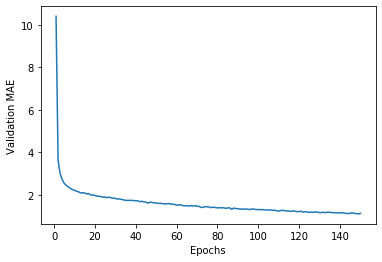

In [30]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [31]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

102/102 [==============================] - 0s 3ms/step


2.762699847127877